In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("latestDataofsensor.csv")

In [3]:
data.head()

,Unnamed: 0,DeviceId,Date,Time,Parking_Status
0,0,00-80-00-00-04-01-a4-a2,2021-08-15,16:56:13,0
1,1,00-80-00-00-04-01-a4-a2,2021-07-30,19:47:47,0
2,2,00-80-00-00-04-01-a4-a2,2021-08-16,20:23:31,0
3,3,00-80-00-00-04-01-a4-a2,2021-06-06,15:25:40,0
4,4,00-80-00-00-04-01-a4-a2,2021-08-07,04:55:33,0


In [4]:
datanew = data.drop("Unnamed: 0", axis = 1)

In [5]:
data_sort = datanew.sort_values(['Date', 'Time'], ascending=[True, True])

In [6]:
data_sort.dtypes
print(data_sort)

                       DeviceId        Date      Time  Parking_Status
187535  00-80-00-00-04-01-a0-20  2020-12-15  10:44:50               0
187536  00-80-00-00-04-01-a0-20  2020-12-15  10:44:50               0
221189  00-80-00-00-04-01-a0-20  2020-12-15  10:44:50               0
217532  00-80-00-00-04-01-a0-20  2021-02-18  07:41:02               1
77007   00-80-00-00-04-01-a4-9f  2021-02-18  07:41:20               1
...                         ...         ...       ...             ...
86443   00-80-00-00-04-01-a4-9f  2021-11-11  13:19:43               1
39926   00-80-00-00-04-01-a4-a2  2021-11-11  13:19:55               0
134675  00-80-00-00-04-01-9f-d8  2021-11-11  13:21:04               1
479113  00-80-00-00-04-01-a4-91  2021-11-11  13:21:15               1
273557  00-80-00-00-04-01-a4-b7  2021-11-11  13:21:46               0

[490655 rows x 4 columns]


In [7]:
data_sort["datetime"] = data_sort["Date"]+ " " +data_sort["Time"]

In [8]:
datanew.head()

,DeviceId,Date,Time,Parking_Status
0,00-80-00-00-04-01-a4-a2,2021-08-15,16:56:13,0
1,00-80-00-00-04-01-a4-a2,2021-07-30,19:47:47,0
2,00-80-00-00-04-01-a4-a2,2021-08-16,20:23:31,0
3,00-80-00-00-04-01-a4-a2,2021-06-06,15:25:40,0
4,00-80-00-00-04-01-a4-a2,2021-08-07,04:55:33,0


In [9]:
data_sort.datetime = data_sort.datetime.astype('datetime64')

In [10]:
data_sort.dtypes

DeviceId                  object
Date                      object
Time                      object
Parking_Status             int64
datetime          datetime64[ns]
dtype: object

In [11]:
datanew_clean = data_sort.copy()

In [12]:
datanew_clean['adate'] = datanew_clean.datetime.dt.date
datanew_clean['day'] = datanew_clean.datetime.dt.day
datanew_clean['month'] = datanew_clean.datetime.dt.month
datanew_clean['date_time_halfhour'] = datanew_clean.datetime.dt.round('30min')
datanew_clean['atime'] = datanew_clean.date_time_halfhour.dt.time
datanew_clean['btime'] = datanew_clean.date_time_halfhour.dt.strftime('%H:%M')

In [13]:
datanew_clean.head()

,DeviceId,Date,Time,Parking_Status,datetime,adate,day,month,date_time_halfhour,atime,btime
187535,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:30:00,10:30:00,10:30
187536,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:30:00,10:30:00,10:30
221189,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:30:00,10:30:00,10:30
217532,00-80-00-00-04-01-a0-20,2021-02-18,07:41:02,1,2021-02-18 07:41:02,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30
77007,00-80-00-00-04-01-a4-9f,2021-02-18,07:41:20,1,2021-02-18 07:41:20,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30


In [14]:
#datanew_clean.to_csv('data.csv', index=False)
datanew_clean['Sensorp'] = datanew_clean['DeviceId'].replace(['00-80-00-00-04-01-a4-a2','00-80-00-00-04-01-a4-9f','00-80-00-00-04-01-9f-d8', '00-80-00-00-04-01-a4-8d' ,'00-80-00-00-04-01-a0-20','00-80-00-00-04-01-a4-b7','00-80-00-00-04-01-9f-db','00-80-00-00-04-01-9f-d7','00-80-00-00-04-01-9f-ea','00-80-00-00-04-01-a4-91'],['Sensor1','Sensor2','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7','Sensor8','Sensor9','Sensor10'])

In [15]:
datanew_clean.groupby('atime').size()
print(datanew_clean['DeviceId'].unique())
datanew_clean.head()

['00-80-00-00-04-01-a0-20' '00-80-00-00-04-01-a4-9f'
 '00-80-00-00-04-01-9f-db' '00-80-00-00-04-01-a4-a2'
 '00-80-00-00-04-01-a4-8d' '00-80-00-00-04-01-9f-d8'
 '00-80-00-00-04-01-a4-b7' '00-80-00-00-04-01-9f-ea'
 '00-80-00-00-04-01-a4-91' '00-80-00-00-04-01-9f-d7']


,DeviceId,Date,Time,Parking_Status,datetime,adate,day,month,date_time_halfhour,atime,btime,Sensorp
187535,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:30:00,10:30:00,10:30,Sensor5
187536,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:30:00,10:30:00,10:30,Sensor5
221189,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:30:00,10:30:00,10:30,Sensor5
217532,00-80-00-00-04-01-a0-20,2021-02-18,07:41:02,1,2021-02-18 07:41:02,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30,Sensor5
77007,00-80-00-00-04-01-a4-9f,2021-02-18,07:41:20,1,2021-02-18 07:41:20,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30,Sensor2


In [16]:
aggregatedatanew = datanew_clean.drop_duplicates(['btime','month','day','Sensorp'], keep="last")

In [17]:
aggregatedatanew.head()

,DeviceId,Date,Time,Parking_Status,datetime,adate,day,month,date_time_halfhour,atime,btime,Sensorp
221189,00-80-00-00-04-01-a0-20,2020-12-15,10:44:50,0,2020-12-15 10:44:50,2020-12-15,15,12,2020-12-15 10:30:00,10:30:00,10:30,Sensor5
217532,00-80-00-00-04-01-a0-20,2021-02-18,07:41:02,1,2021-02-18 07:41:02,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30,Sensor5
77007,00-80-00-00-04-01-a4-9f,2021-02-18,07:41:20,1,2021-02-18 07:41:20,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30,Sensor2
309155,00-80-00-00-04-01-9f-db,2021-02-18,07:43:05,1,2021-02-18 07:43:05,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30,Sensor7
31646,00-80-00-00-04-01-a4-a2,2021-02-18,07:43:19,1,2021-02-18 07:43:19,2021-02-18,18,2,2021-02-18 07:30:00,07:30:00,07:30,Sensor1


In [18]:
aggregatedatanewsub = aggregatedatanew[['datetime','Sensorp', 'adate', 'btime', 'day', 'month', 'Parking_Status']]

In [19]:
aggregatedatanewsub.head()

,datetime,Sensorp,adate,btime,day,month,Parking_Status
221189,2020-12-15 10:44:50,Sensor5,2020-12-15,10:30,15,12,0
217532,2021-02-18 07:41:02,Sensor5,2021-02-18,07:30,18,2,1
77007,2021-02-18 07:41:20,Sensor2,2021-02-18,07:30,18,2,1
309155,2021-02-18 07:43:05,Sensor7,2021-02-18,07:30,18,2,1
31646,2021-02-18 07:43:19,Sensor1,2021-02-18,07:30,18,2,1


In [20]:
aggregatedatanewsub.reset_index(drop=True)

,datetime,Sensorp,adate,btime,day,month,Parking_Status
0,2020-12-15 10:44:50,Sensor5,2020-12-15,10:30,15,12,0
1,2021-02-18 07:41:02,Sensor5,2021-02-18,07:30,18,2,1
2,2021-02-18 07:41:20,Sensor2,2021-02-18,07:30,18,2,1
3,2021-02-18 07:43:05,Sensor7,2021-02-18,07:30,18,2,1
4,2021-02-18 07:43:19,Sensor1,2021-02-18,07:30,18,2,1
...,...,...,...,...,...,...,...
84786,2021-11-11 13:19:43,Sensor2,2021-11-11,13:30,11,11,1
84787,2021-11-11 13:19:55,Sensor1,2021-11-11,13:30,11,11,0
84788,2021-11-11 13:21:04,Sensor3,2021-11-11,13:30,11,11,1
84789,2021-11-11 13:21:15,Sensor10,2021-11-11,13:30,11,11,1


In [21]:
aggregatedatanewsub.groupby('btime').count()['Parking_Status']

btime
00:00    1940
00:30    1740
01:00    1740
01:30    1740
02:00    1730
02:30    1730
03:00    1730
03:30    1739
04:00    1739
04:30    1739
05:00    1739
05:30    1736
06:00    1724
06:30    1709
07:00    1702
07:30    1722
08:00    1724
08:30    1728
09:00    1704
09:30    1708
10:00    1714
10:30    1721
11:00    1726
11:30    1756
12:00    1772
12:30    1765
13:00    1793
13:30    1784
14:00    1803
14:30    1804
15:00    1812
15:30    1819
16:00    1814
16:30    1814
17:00    1803
17:30    1813
18:00    1811
18:30    1803
19:00    1783
19:30    1802
20:00    1794
20:30    1794
21:00    1794
21:30    1804
22:00    1795
22:30    1796
23:00    1796
23:30    1743
Name: Parking_Status, dtype: int64

In [22]:
aggregatedatanewsub.assign(Capacity='10')

,datetime,Sensorp,adate,btime,day,month,Parking_Status,Capacity
221189,2020-12-15 10:44:50,Sensor5,2020-12-15,10:30,15,12,0,10
217532,2021-02-18 07:41:02,Sensor5,2021-02-18,07:30,18,2,1,10
77007,2021-02-18 07:41:20,Sensor2,2021-02-18,07:30,18,2,1,10
309155,2021-02-18 07:43:05,Sensor7,2021-02-18,07:30,18,2,1,10
31646,2021-02-18 07:43:19,Sensor1,2021-02-18,07:30,18,2,1,10
...,...,...,...,...,...,...,...,...
86443,2021-11-11 13:19:43,Sensor2,2021-11-11,13:30,11,11,1,10
39926,2021-11-11 13:19:55,Sensor1,2021-11-11,13:30,11,11,0,10
134675,2021-11-11 13:21:04,Sensor3,2021-11-11,13:30,11,11,1,10
479113,2021-11-11 13:21:15,Sensor10,2021-11-11,13:30,11,11,1,10


In [23]:
aggregatedatanewsub.reset_index(drop=True)
aggregatedata = aggregatedatanewsub.groupby(['month','day','btime','Parking_Status']).size().reset_index(name='Occp')

In [24]:
print(aggregatedata)

       month  day  btime  Parking_Status  Occp
0          2   18  00:00               0     7
1          2   18  00:00               1     2
2          2   18  07:30               1     7
3          2   18  08:00               1     9
4          2   18  08:30               1     9
...      ...  ...    ...             ...   ...
15448     11   11  13:00               0     2
15449     11   11  13:00               1     7
15450     11   11  13:30               0     2
15451     11   11  13:30               1     7
15452     12   15  10:30               0     1

[15453 rows x 5 columns]


In [25]:
len(aggregatedata)

aggregatedata.reset_index(drop=True)


,month,day,btime,Parking_Status,Occp
0,2,18,00:00,0,7
1,2,18,00:00,1,2
2,2,18,07:30,1,7
3,2,18,08:00,1,9
4,2,18,08:30,1,9
...,...,...,...,...,...
15448,11,11,13:00,0,2
15449,11,11,13:00,1,7
15450,11,11,13:30,0,2
15451,11,11,13:30,1,7


In [26]:
aggregatedata.head()
#aggregatedatanewsub["OccupiedPS"] = aggregatedata["Occp"].values


,month,day,btime,Parking_Status,Occp
0,2,18,00:00,0,7
1,2,18,00:00,1,2
2,2,18,07:30,1,7
3,2,18,08:00,1,9
4,2,18,08:30,1,9


In [27]:

aggregatedata = aggregatedata[aggregatedata.Parking_Status != 0]

aggregatedata.head()

,month,day,btime,Parking_Status,Occp
1,2,18,00:00,1,2
2,2,18,07:30,1,7
3,2,18,08:00,1,9
4,2,18,08:30,1,9
5,2,18,09:00,1,9


In [28]:

aggregatedata.assign(ParkingLot='University_Parking')

,month,day,btime,Parking_Status,Occp,ParkingLot
1,2,18,00:00,1,2,University_Parking
2,2,18,07:30,1,7,University_Parking
3,2,18,08:00,1,9,University_Parking
4,2,18,08:30,1,9,University_Parking
5,2,18,09:00,1,9,University_Parking
...,...,...,...,...,...,...
15443,11,11,11:30,1,9,University_Parking
15445,11,11,12:00,1,9,University_Parking
15447,11,11,12:30,1,9,University_Parking
15449,11,11,13:00,1,7,University_Parking


In [29]:
aggregatedata['TotalCapacity'] = 10

In [30]:
aggregatedata["PercentOccupany"]= (aggregatedata['Occp']/aggregatedata['TotalCapacity'])*100



In [31]:
aggregatedata.dtypes
aggregatedata["datetime"] = "2021"+"-"+ aggregatedata["month"].astype(str) + "-" + aggregatedata["day"].astype(str) + " " + aggregatedata["btime"]
aggregatedata.head()


,month,day,btime,Parking_Status,Occp,TotalCapacity,PercentOccupany,datetime
1,2,18,00:00,1,2,10,20.0,2021-2-18 00:00
2,2,18,07:30,1,7,10,70.0,2021-2-18 07:30
3,2,18,08:00,1,9,10,90.0,2021-2-18 08:00
4,2,18,08:30,1,9,10,90.0,2021-2-18 08:30
5,2,18,09:00,1,9,10,90.0,2021-2-18 09:00


In [32]:
aggregatedata.datetime = aggregatedata.datetime.astype('datetime64')
aggregatedata.head()

,month,day,btime,Parking_Status,Occp,TotalCapacity,PercentOccupany,datetime
1,2,18,00:00,1,2,10,20.0,2021-02-18 00:00:00
2,2,18,07:30,1,7,10,70.0,2021-02-18 07:30:00
3,2,18,08:00,1,9,10,90.0,2021-02-18 08:00:00
4,2,18,08:30,1,9,10,90.0,2021-02-18 08:30:00
5,2,18,09:00,1,9,10,90.0,2021-02-18 09:00:00


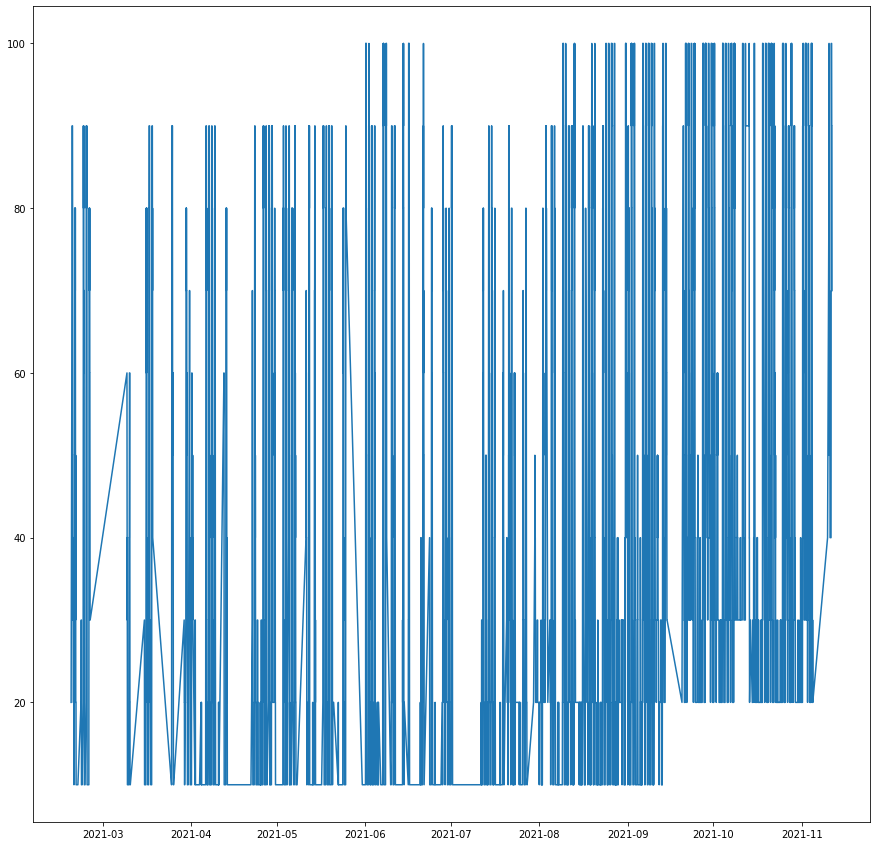

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(aggregatedata["datetime"], aggregatedata["PercentOccupany"])

In [34]:
month_aggregate = aggregatedata.groupby('month', as_index=False).agg({'PercentOccupany':"mean"})

Text(0.5, 1.0, 'Aggregated Overall Parking Area Occupancy over different Months')

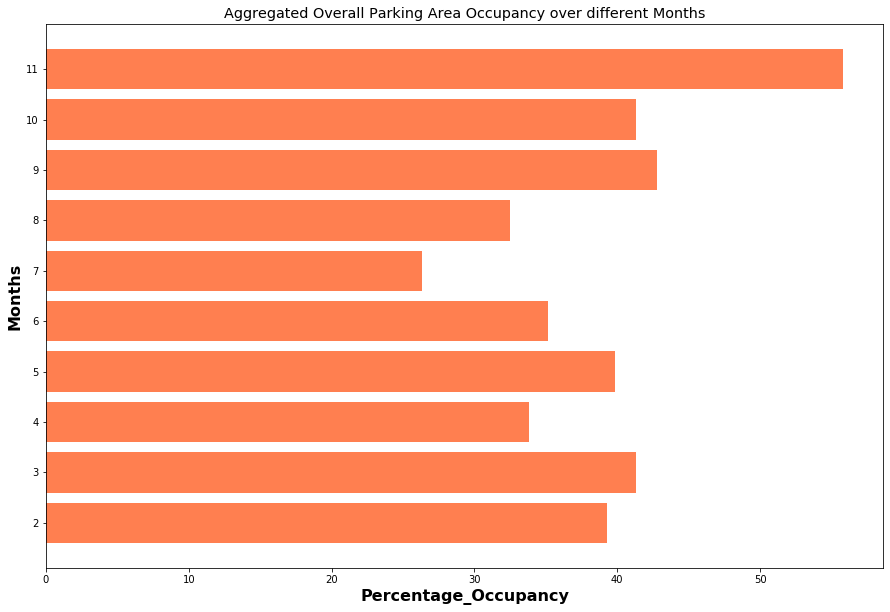

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
plt.style.use('ggplot')
ax.barh(month_aggregate["month"], month_aggregate["PercentOccupany"], color = 'coral')
ax.set_yticks(month_aggregate["month"])
#ax.set_xticks(month_aggregate["PercentOccupany"])
plt.ylabel("Months", fontsize=16, fontweight='bold')
plt.xlabel("Percentage_Occupancy", fontsize=16, fontweight='bold')
plt.title("Aggregated Overall Parking Area Occupancy over different Months")


In [36]:
day_aggregate = aggregatedata.groupby('day', as_index=False).agg({'PercentOccupany':"mean"})

In [37]:
print(day_aggregate)

    day  PercentOccupany
0     1        40.774411
1     2        39.457364
2     3        39.877049
3     4        37.424893
4     5        31.889401
5     6        45.169082
6     7        39.881890
7     8        37.747748
8     9        41.189189
9    10        39.133858
10   11        43.724696
11   12        31.612903
12   13        35.429864
13   14        40.966184
14   15        29.877301
15   16        35.213270
16   17        28.723404
17   18        36.636771
18   19        34.688645
19   20        35.560166
20   21        39.586777
21   22        34.823529
22   23        36.132404
23   24        33.873874
24   25        32.000000
25   26        37.456140
26   27        41.935484
27   28        43.750000
28   29        41.022222
29   30        34.980237
30   31        31.807910


Text(0.5, 1.0, 'Aggregated Overall Parking Area Occupancy over Days of Month')

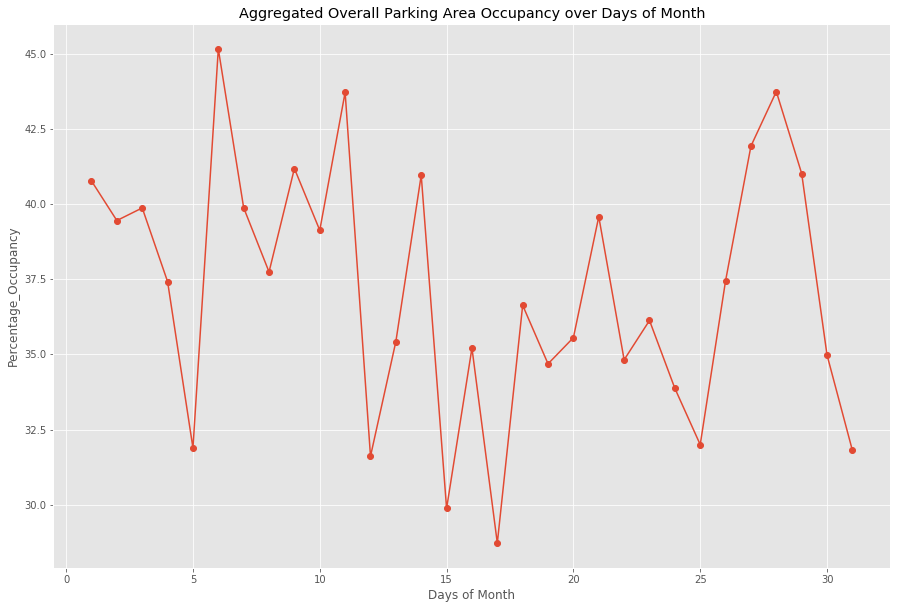

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
plt.style.use('ggplot')
ax.plot(day_aggregate["day"], day_aggregate["PercentOccupany"],marker='o')
plt.xlabel("Days of Month")
plt.ylabel("Percentage_Occupancy")
plt.title("Aggregated Overall Parking Area Occupancy over Days of Month")


In [39]:
time_aggregate = aggregatedata.groupby(['btime'], as_index=False).agg({'PercentOccupany':["mean"]})

In [40]:
print(time_aggregate)

    btime PercentOccupany
                     mean
0   00:00       17.214286
1   00:30       17.099237
2   01:00       17.153846
3   01:30       17.209302
4   02:00       17.519380
5   02:30       20.735294
6   03:00       21.544118
7   03:30       21.751825
8   04:00       23.311258
9   04:30       34.102564
10  05:00       51.257862
11  05:30       60.310559
12  06:00       66.459627
13  06:30       68.385093
14  07:00       69.750000
15  07:30       71.419753
16  08:00       71.411043
17  08:30       70.853659
18  09:00       69.509202
19  09:30       70.185185
20  10:00       68.650307
21  10:30       67.682927
22  11:00       61.488095
23  11:30       59.649123
24  12:00       56.069364
25  12:30       47.325581
26  13:00       39.142857
27  13:30       34.685714
28  14:00       30.685714
29  14:30       28.208092
30  15:00       26.647059
31  15:30       24.152047
32  16:00       22.909091
33  16:30       21.910828
34  17:00       20.201342
35  17:30       19.000000
36  18:00   

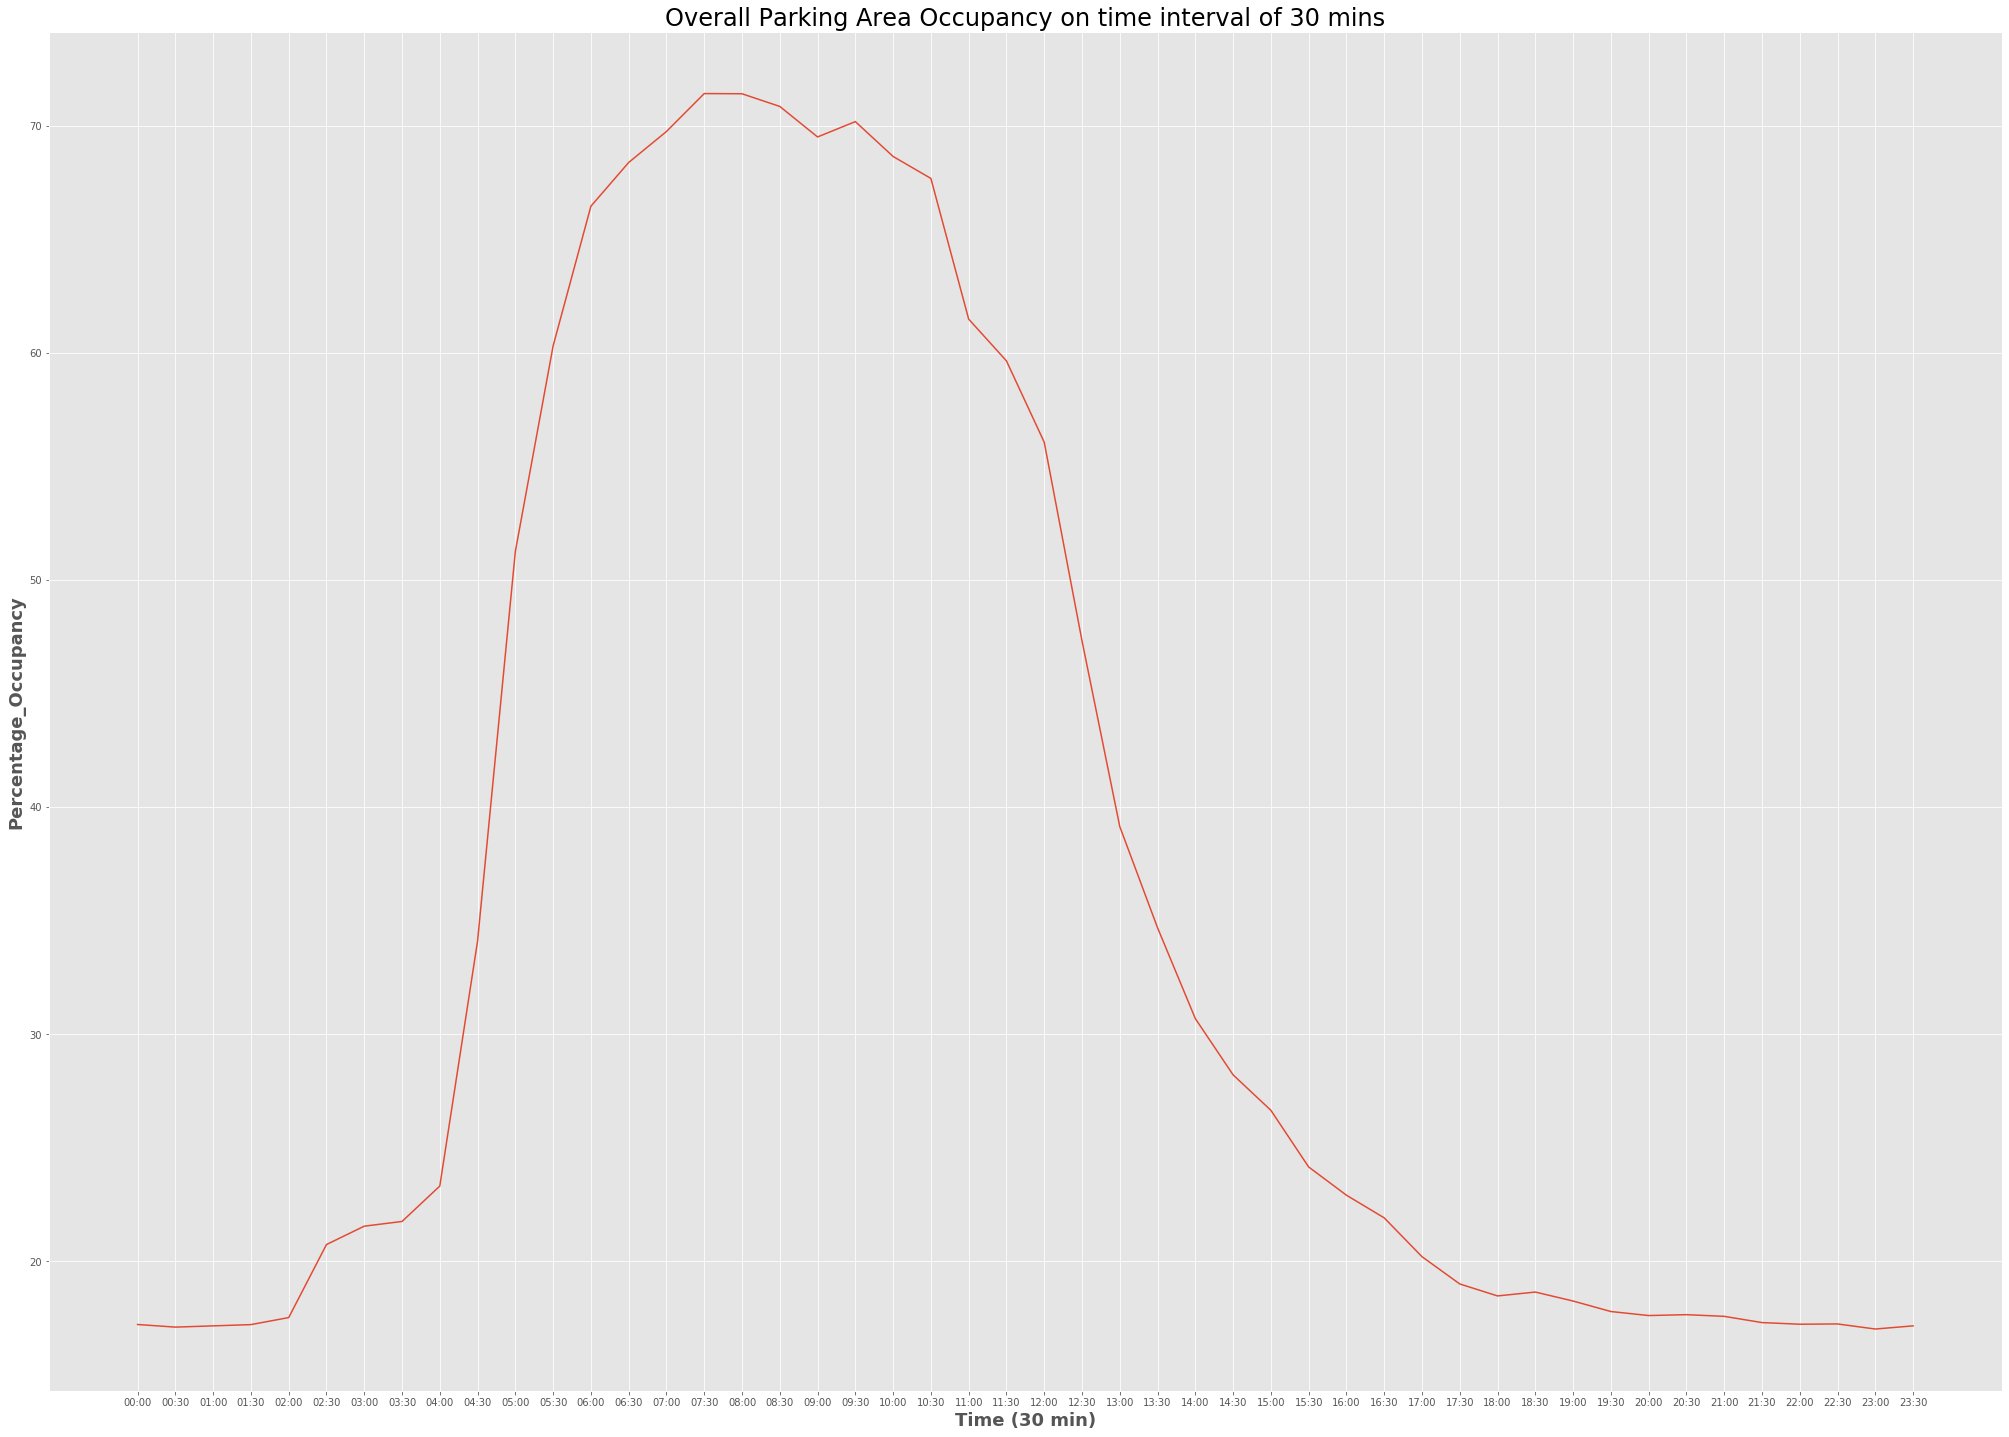

In [41]:
fig, ax = plt.subplots(figsize=(35,25))
plt.style.use('ggplot')
ax.plot(time_aggregate["btime"], time_aggregate["PercentOccupany"])
#plt.legend(loc='upper left', frameon=False)
#plt.xlabel("time")
ax.set_xlabel('Time (30 min)', fontsize=18, fontweight='bold')
plt.ylabel("Percentage_Occupancy", fontsize=18, fontweight='bold')
plt.title("Overall Parking Area Occupancy on time interval of 30 mins", fontsize=24)
#plt.rcParams.update({'font.size': 12})
plt.rc('xtick', labelsize=12) 

<h>Individual Sensor Analysis</h>

In [50]:
temp = aggregatedata.copy()

temp.reset_index(drop=True)
#temp.head()
temp.drop(columns = ['month','day','Parking_Status','Occp','TotalCapacity','btime'], inplace = True)
temp.head()
#temp = temp.drop(columns=['Occupancy', 'Capacity'], inplace=True)
#df_agg_dthh.drop([pd.Timestamp('2016-10-28 08:00:00'), pd.Timestamp('2016-12-13 13:30:00')], inplace=True)

,PercentOccupany,datetime
1,20.0,2021-02-18 00:00:00
2,70.0,2021-02-18 07:30:00
3,90.0,2021-02-18 08:00:00
4,90.0,2021-02-18 08:30:00
5,90.0,2021-02-18 09:00:00


In [51]:
#temp1 = temp.copy()
#temp = temp.reset_index(drop=True)
#temp['date'] = temp.datetime.dt.date
#temp['time'] = temp.datetime.dt.time
#temp = temp.groupby('date').count()
#temp = pd.DataFrame(temp, index=pd.date_range('2021-10-04', '2021-11-15')).fillna(0)
#temp[temp.datetime<18]

print(temp)


       PercentOccupany            datetime
1                 20.0 2021-02-18 00:00:00
2                 70.0 2021-02-18 07:30:00
3                 90.0 2021-02-18 08:00:00
4                 90.0 2021-02-18 08:30:00
5                 90.0 2021-02-18 09:00:00
...                ...                 ...
15443             90.0 2021-11-11 11:30:00
15445             90.0 2021-11-11 12:00:00
15447             90.0 2021-11-11 12:30:00
15449             70.0 2021-11-11 13:00:00
15451             70.0 2021-11-11 13:30:00

[7305 rows x 2 columns]


In [ ]:
#df_agg_fillmissing = temp.copy()

In [ ]:
#indexNames = df_agg_fillmissing[ df_agg_fillmissing[''] == ['2021-11-05',] ].index

In [ ]:

   

        ##fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 6, 15, 30)
        #fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 7, 16, 0)
        #fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 8, 17, 0)

# fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 20, 8, 0)
# fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 21, 8, 0)
        #fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 9, 16, 0)
        #fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 12, 16, 30)
        #fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 13, 9, 0)
        #fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 14, 8, 30)
        #fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2021, 11, 15, 11, 0)
        

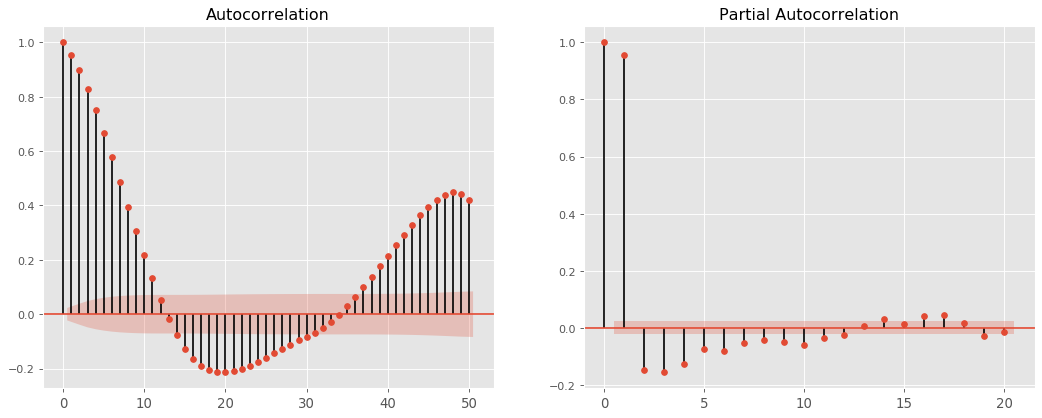

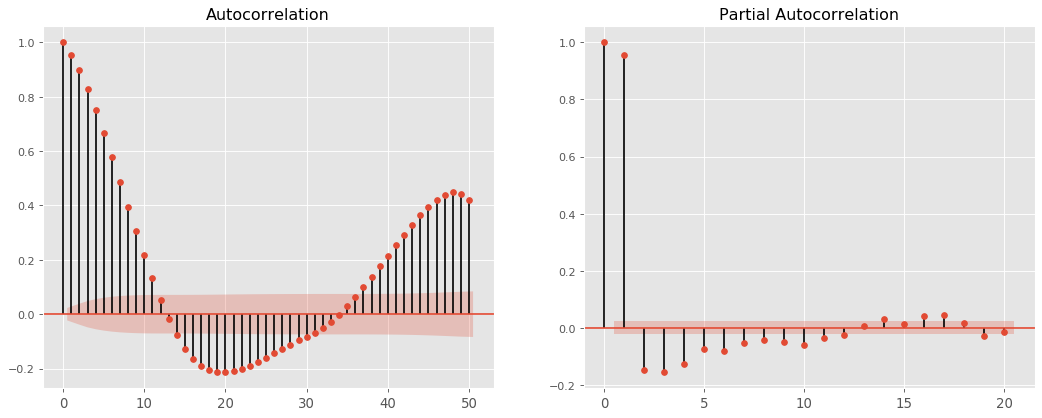

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#subplots_acf_pacf(temp)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(temp.PercentOccupany, ax=ax1, lags=50)
plot_pacf(temp.PercentOccupany, ax=ax2, lags=20)

In [69]:
#test_stationarity(temp.squeeze(), 18)
index=temp.set_index('datetime')


In [66]:
#dataSensor1.loc[(dataSensor1['adate'] == '2021-11-02'), 'Parking_Status'].sum()

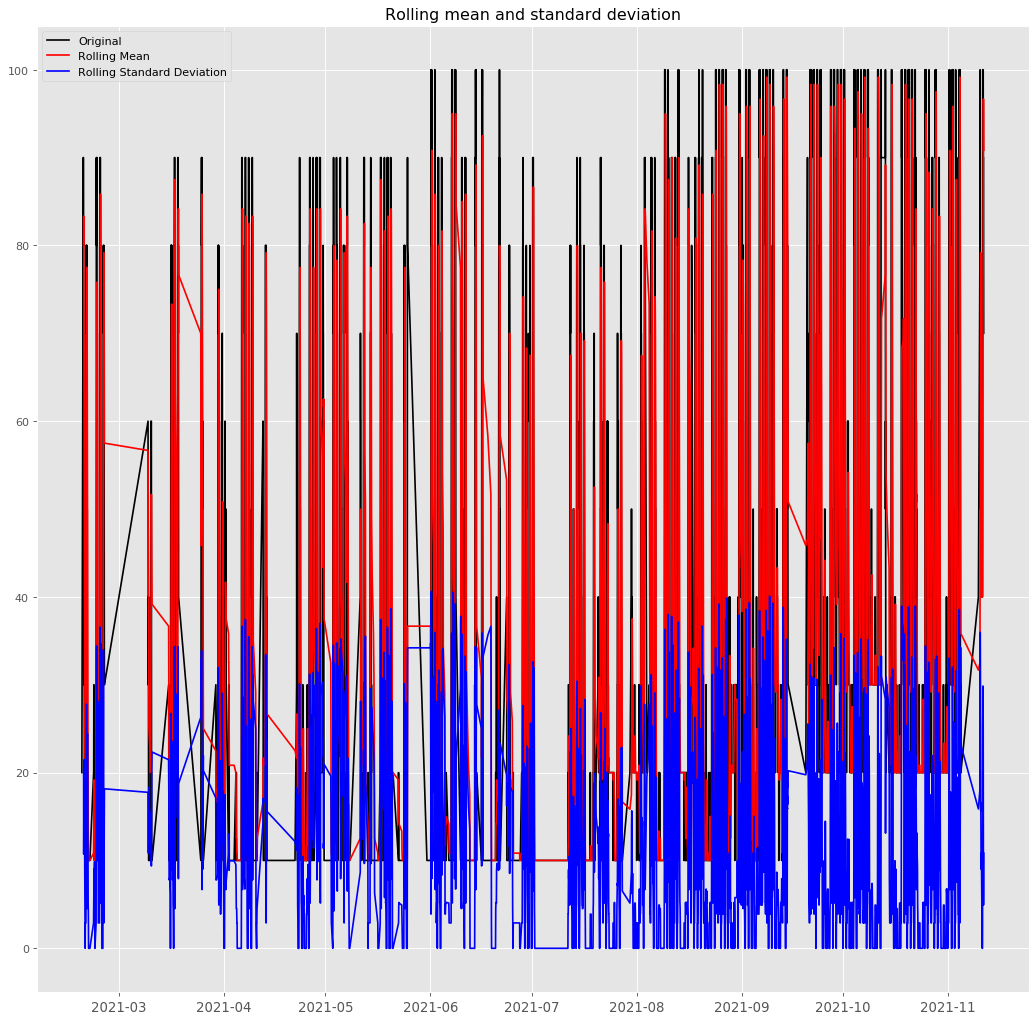

In [74]:
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
fig, ax1 = plt.subplots(figsize=(16,16), dpi= 80)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [102]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
print(tscv)


data_use = temp.reset_index()['PercentOccupany']

for train_index, test_index in tscv.split(data_use):
    train = data_use[train_index]
    test = data_use[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [103]:
train.index = temp.index[:len(train)]
train.tail()

13150    30.0
13152    30.0
13154    30.0
13156    30.0
13158    30.0
Name: PercentOccupany, dtype: float64

In [104]:
test.index = temp.index[len(train):]
test.head()

13160    30.0
13162    30.0
13164    40.0
13166    40.0
13168    40.0
Name: PercentOccupany, dtype: float64

In [105]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train, order=(5, 1, 0))
results_AR = arima_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


KeyError: 0

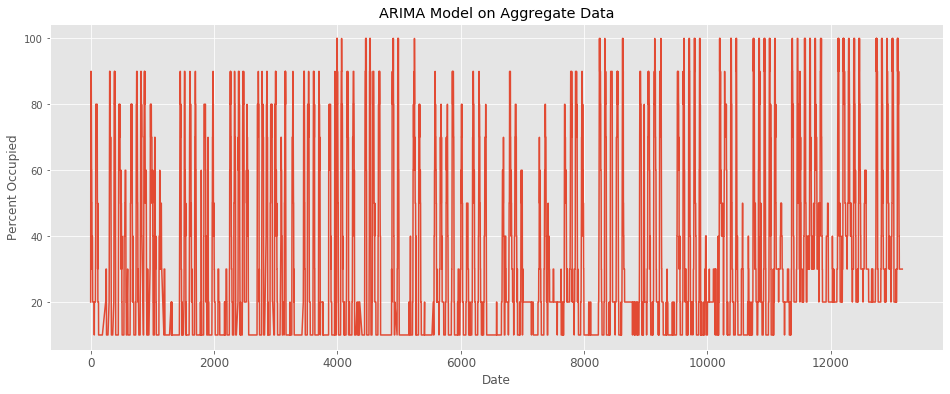

In [106]:
plt.figure(figsize=(16,6))
plt.title('ARIMA Model on Aggregate Data')
plt.plot(train, label='Training Actual Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Percent Occupied')
y_pred_AR = pd.Series(results_AR.forecast(steps=len(test))[0], index=test.index)
report_metrics(test.squeeze(), y_pred_AR.squeeze())
plt.plot(test, label='Testing Actual Occupancy Rate')
plt.plot(y_pred_AR, color='purple', label='ARIMA Predicted Occupancy Rate')
plt.legend()

plt.show()


print('-'*77)
print('ARIMA Model Metrics on Test Data')
print('='*77)


In [ ]:
print(df2)

In [ ]:
plt.plot(df2["btime"], df2["Parking_Status"])

In [ ]:
df2 = df2.drop_duplicates(subset='btime', keep="last")

In [ ]:
print(df2)

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(df2["btime"], df2["Parking_Status"])